# 1) Objective

Quoting the right fare to customers before starting the trip has been a challenge for various cab operators because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted.

Objective: To address this problem, a Cab operator wants to a build machine learning model for predicting the optimal trip fare based on useful features of the trip.

# 2) Data Description

The data set includes the following variables:
* trip_duration: Duration of Journey [in Seconds]
* distance_traveled: Distance travelled by taxi [in Km]
* num_of_passengers: Number of passengers were in the taxi.
* tip: Tip received by driver [In INR]
* miscellaneous_fees: Any additional charges during the trip - e.g. tolls, convenience fees, GST etc.[In INR]
* surge_applied: Was there a surge pricing applied? Yes, No
* Total fare: fare for the journey

Data Source: Open Source

# 3) Importing necessary libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_log_error
import warnings
warnings.filterwarnings("ignore")

# 4) Importing Data

In [74]:
data= pd.read_csv("C:/Users/tanmo/Desktop/Regression Project/data.csv")

# 5) Data Preprocessing and Understanding

In [75]:
#Checking number of duplicate values
data.duplicated().sum()

127

In [76]:
#Dropping duplicates
data.drop_duplicates(inplace=True)

In [77]:
#Rechecking  number of for duplicate values
data.duplicated().sum()

0

In [78]:
# Looking into data
data.head()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied,total_fare
0,748,2.75,1,24,6.300,No,105.300
1,1187,3.43,1,24,13.200,No,142.200
2,730,3.12,1,0,26.625,Yes,97.875
3,671,5.63,3,0,9.750,No,99.750
4,329,2.09,1,12,13.200,No,70.200


In [79]:
# Checking number of rows and columns in dataset.
data.shape

(29873, 7)

In [80]:
# Checking basic info of features present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29873 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       29873 non-null  int64  
 1   distance_traveled   29873 non-null  float64
 2   num_of_passengers   29873 non-null  int64  
 3   tip                 29873 non-null  int64  
 4   miscellaneous_fees  29873 non-null  float64
 5   surge_applied       29873 non-null  object 
 6   total_fare          29873 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.8+ MB


# 6) EDA

### 6.1) Viewing overall description of data and checking errorneous data

In [81]:
# Basic description of numerical columns
data.describe()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare
count,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000
mean,1180.508553,4.772011,1.291467,13.111907,15.137304,127.540198
std,4847.426299,4.947719,0.933465,20.724347,12.504019,94.256951
min,0.000000,0.020000,0.000000,0.000000,-0.500000,0.000000
25%,444.000000,1.930000,1.000000,0.000000,6.000000,70.200000
50%,702.000000,3.190000,1.000000,9.000000,9.750000,101.625000
75%,1099.000000,5.680000,1.000000,20.000000,26.450000,152.250000
max,86309.000000,108.920000,9.000000,950.000000,230.875000,2760.375000


From the above table, we can see some errorneous or insignificant data, which are records with total_fare as zero, trip_duartion as zero, num_of_passesngers as zero and negative miscellaneous_fees as price cannot be in negative. Therefore we need to drop these records.

In [82]:
# Dropping errorneous or insignificant data
data=data[(data['miscellaneous_fees']>=0)&(data['trip_duration']>0)&(data['total_fare']>0)&(data['num_of_passengers']>0)]

In [83]:
# Rechecking basic description of numerical columns
data.describe()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare
count,29711.000000,29711.000000,29711.000000,29711.000000,29711.000000,29711.000000
mean,1182.409781,4.772482,1.297499,13.107570,15.137081,127.591093
std,4860.256396,4.945751,0.931758,20.735672,12.491868,94.157686
min,1.000000,0.020000,1.000000,0.000000,0.000000,1.125000
25%,444.000000,1.930000,1.000000,0.000000,6.000000,70.200000
50%,702.000000,3.190000,1.000000,9.000000,9.750000,101.625000
75%,1099.000000,5.700000,1.000000,20.000000,26.450000,152.250000
max,86309.000000,108.920000,9.000000,950.000000,230.875000,2760.375000


In [84]:
# Basic description of categorical columns
data.describe(include='object')

,surge_applied
count,29711
unique,2
top,No
freq,21366


### 6.2) Checking and handling missing values

In [85]:
# Checking missing values
data.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
tip                   0
miscellaneous_fees    0
surge_applied         0
total_fare            0
dtype: int64

As there are no missing values, there is no need to handle missing values.

### 6.3) Univariate Analysis

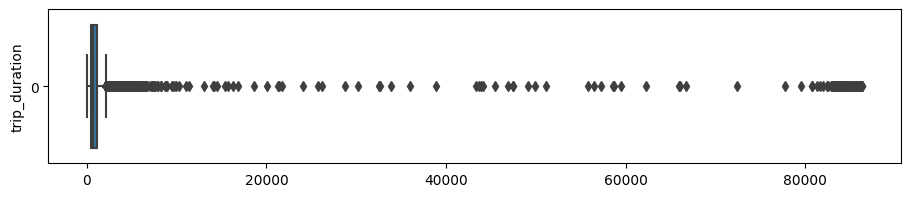

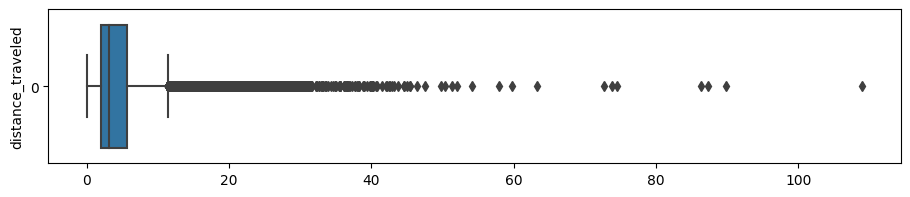

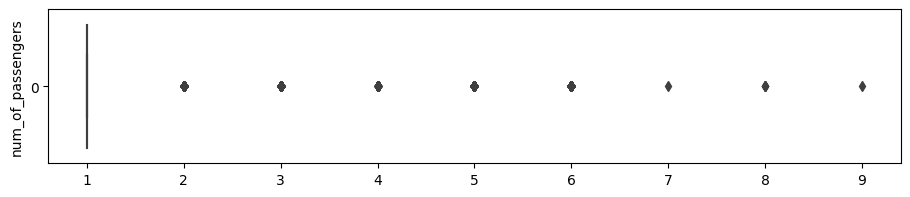

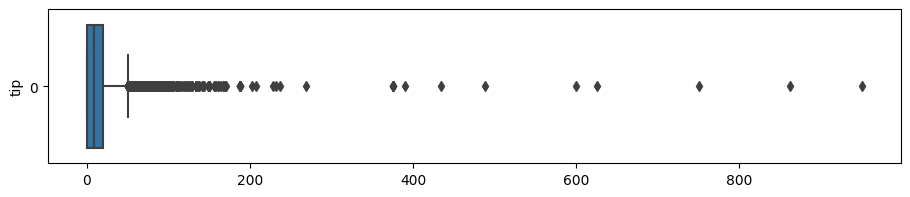

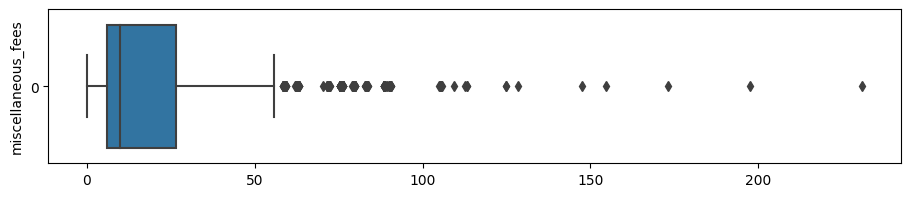

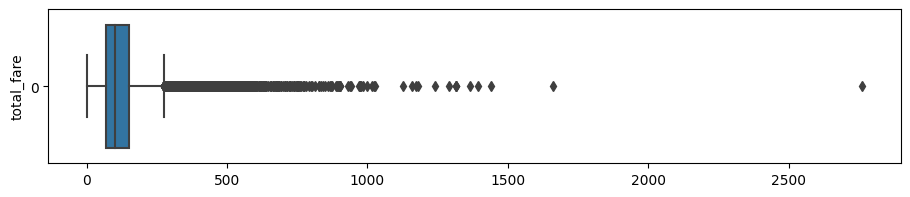

In [86]:
# Plotting box-plot to understand distribution of data
col=list(data.select_dtypes(include='number'))
for i in col:
    fig, ax = plt.subplots(figsize=(11,2))
    sns.boxplot(data=data[i], orient='h',ax=ax)
    plt.ylabel(i)
    plt.show()

From the above box plots we could infer that, the features are positively skewed and range of distribution is quite high.

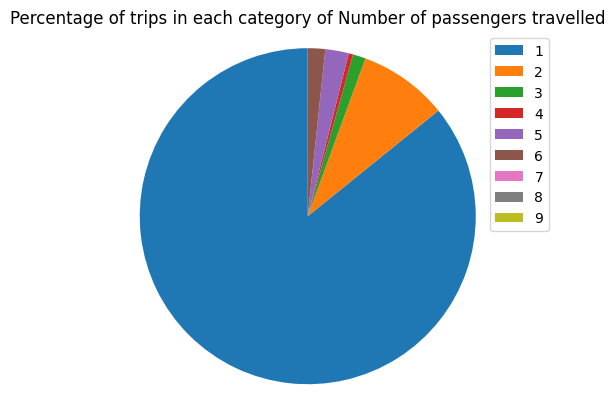

In [87]:
# Plotting pie charts
surge = data.groupby("num_of_passengers")['total_fare'].count().reset_index(name='count')
plt.pie(surge['count'],startangle=90)
plt.axis('equal')
plt.legend(labels=surge['num_of_passengers'], loc='best')
plt.title('Percentage of trips in each category of Number of passengers travelled')
plt.show()

From the above piechart we could infer that number of trips with number of passenger 1 is highest. 

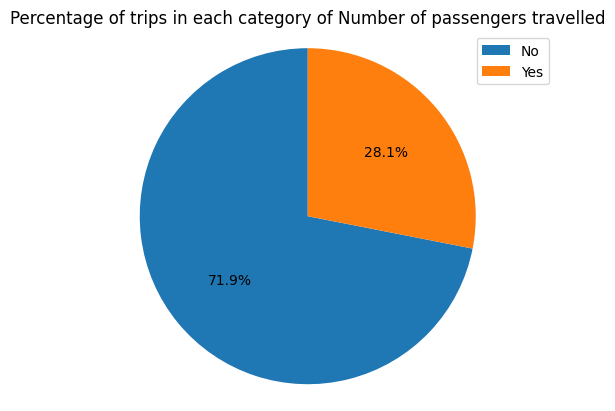

In [88]:
surge=data.groupby("surge_applied")['total_fare'].count().reset_index(name='total_fare')
plt.pie(surge['total_fare'],autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.legend(labels=surge['surge_applied'], loc='best')
plt.title('Percentage of trips in each category of Number of passengers travelled')
plt.show()

From the above piechart we could infer that in most number of trips surge fees were not applied. 

<AxesSubplot: xlabel='trip_duration', ylabel='Count'>

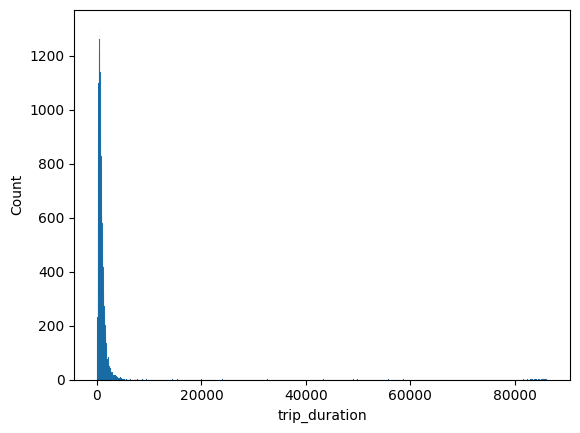

In [89]:
# Plotting Histogram of numerical variables
sns.histplot(data=data,x='trip_duration',alpha=1)

<AxesSubplot: xlabel='distance_traveled', ylabel='Count'>

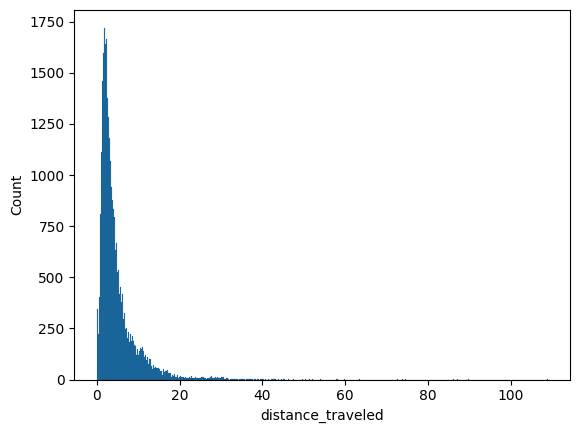

In [90]:
sns.histplot(data=data,x='distance_traveled',alpha=1)

<AxesSubplot: xlabel='num_of_passengers', ylabel='Count'>

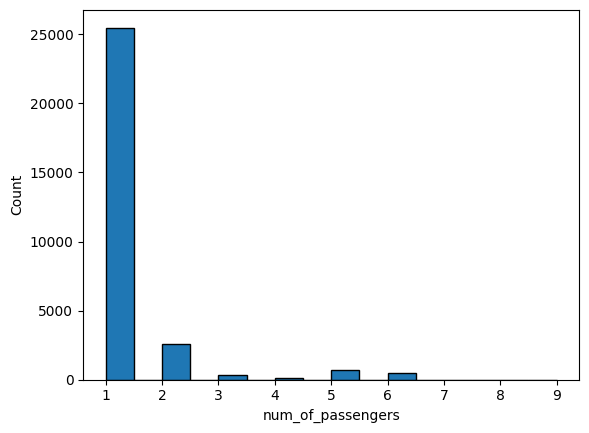

In [91]:
sns.histplot(data=data,x='num_of_passengers',alpha=1)

<AxesSubplot: xlabel='miscellaneous_fees', ylabel='Count'>

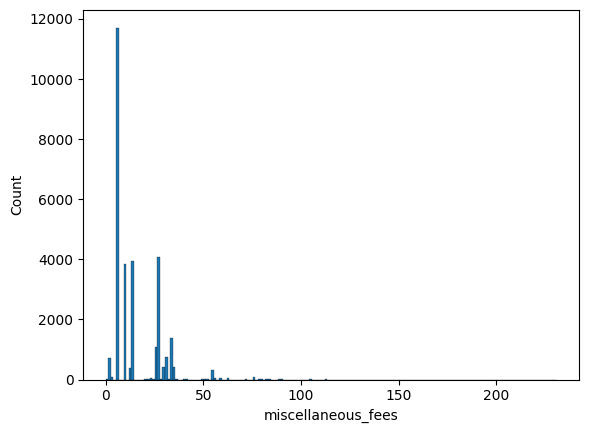

In [92]:
sns.histplot(data=data,x='miscellaneous_fees',alpha=1)

<AxesSubplot: xlabel='trip_duration', ylabel='Count'>

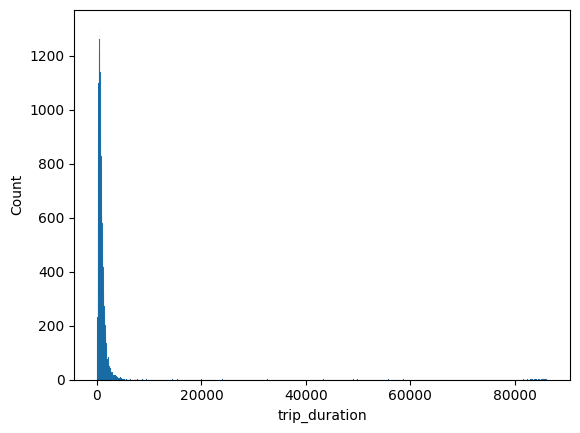

In [93]:
sns.histplot(data=data,x='trip_duration',alpha=1)

<AxesSubplot: xlabel='tip', ylabel='Count'>

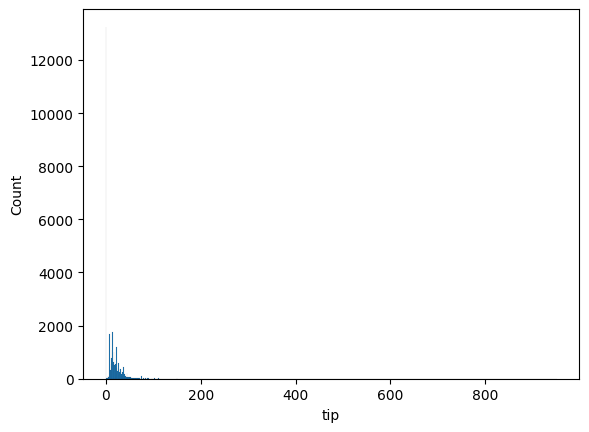

In [94]:
sns.histplot(data=data,x='tip',alpha= 1)

From the above histogram plots we could infer that all the features are right skewed.

### 6.4) Bivariate Analysis

(0.0, 88000.0)

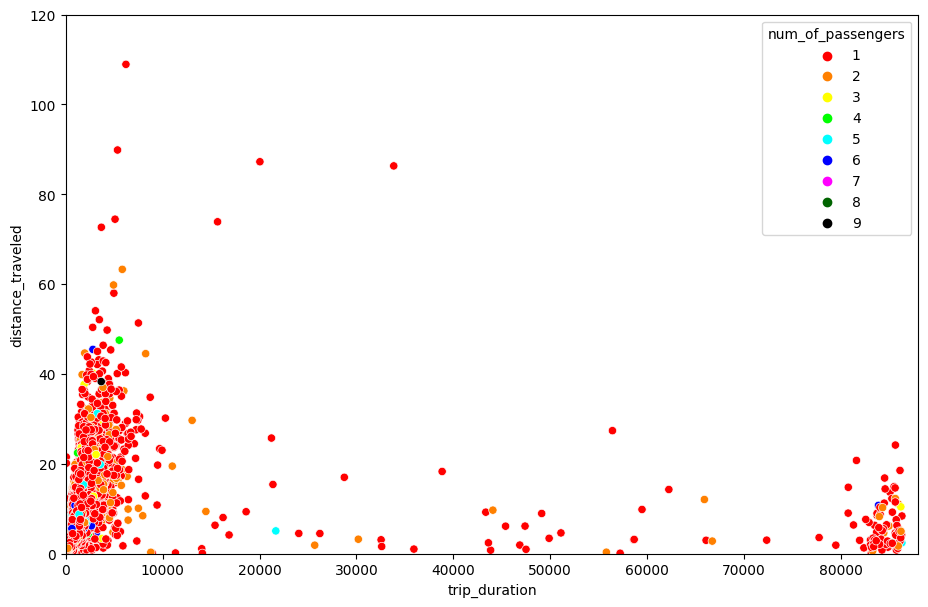

In [95]:
# Scatter plots
bright_palette = ["#FF0000", "#FF8000", "#FFFF00", "#00FF00", "#00FFFF", "#0000FF", "#FF00FF", "#006400",'#000000']
fig, ax = plt.subplots(figsize=(11, 7))  # Set the overall figure size
sns.scatterplot(x=data["trip_duration"], y=data["distance_traveled"],hue=data['num_of_passengers'],palette=bright_palette, ax=ax)
ax.set_ylim(0, 120)
ax.set_xlim(0, 88000)

From the above scatter plot, we could infer that there were trips with high trip duration, but were relatively low distance travelled. This may happen due to breaks in journey.

(0.0, 88000.0)

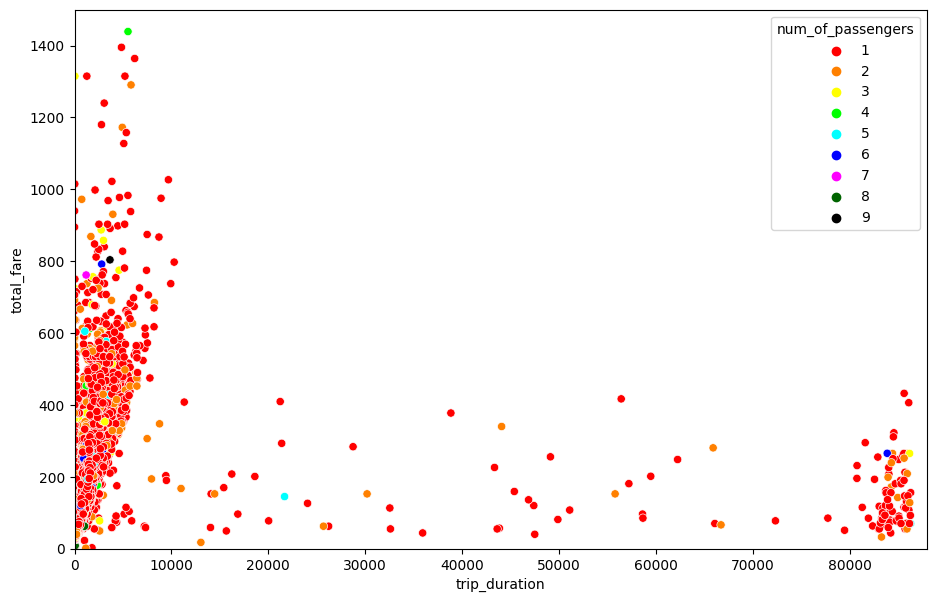

In [96]:
# Scatter plots
bright_palette = ["#FF0000", "#FF8000", "#FFFF00", "#00FF00", "#00FFFF", "#0000FF", "#FF00FF", "#006400",'#000000']
fig, ax = plt.subplots(figsize=(11, 7))  # Set the overall figure size
sns.scatterplot(x=data["trip_duration"], y=data["total_fare"],hue=data['num_of_passengers'],palette=bright_palette, ax=ax)
ax.set_ylim(0, 1500)
ax.set_xlim(0, 88000)

From the above scatter plot, we could infer that there were trips with high trip duration, but were charged relatively low total fare. This may happen due to low distance travelled as we saw in previous scatter plot.

<AxesSubplot: xlabel='num_of_passengers', ylabel='total_fare'>

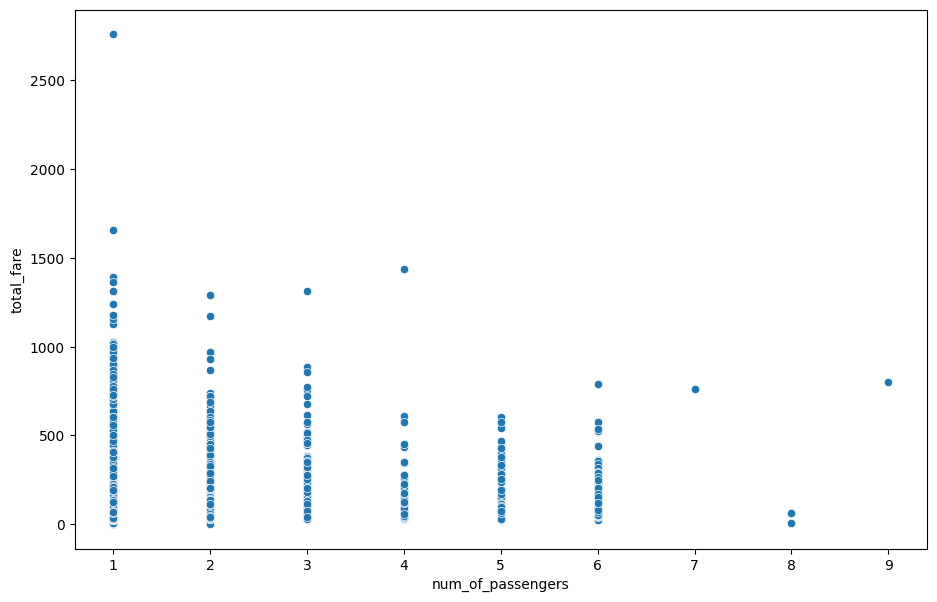

In [97]:
# Scatter plots
fig, ax = plt.subplots(figsize=(11, 7))  # Set the overall figure size
sns.scatterplot(x=data["num_of_passengers"], y=data["total_fare"], ax=ax)

From the scatter plot we could infer highest bill amount is from a trip with number of passergers 1.

### 6.5) Handling categorical variable

In [98]:
# Encoding of Categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['surge_applied']=encoder.fit_transform(data['surge_applied'])

### 6.6) Checking multicollinearity

<AxesSubplot: >

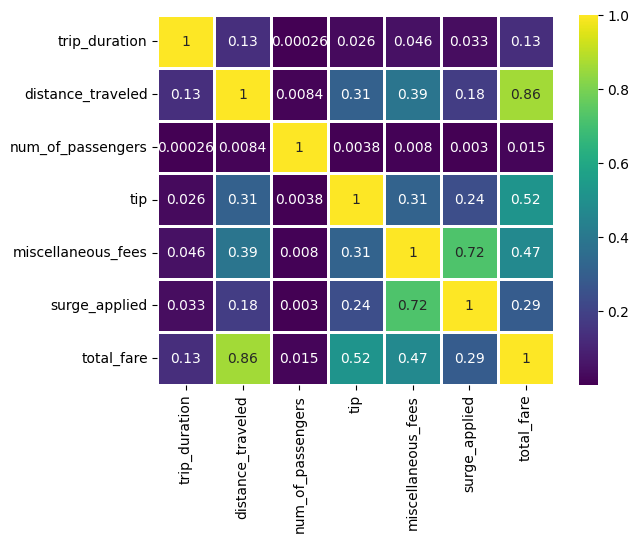

In [99]:
# Checking correlation between variables
Correlation=data.corr()
sns.heatmap(Correlation,cmap='viridis',annot=True,linewidth=2)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = data[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees', 'surge_applied']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


              feature       VIF
0       trip_duration  1.075456
1   distance_traveled  2.408667
2   num_of_passengers  1.769659
3                 tip  1.619925
4  miscellaneous_fees  5.307121
5       surge_applied  2.933492


From the above correlation matrix and VIF results, we could see that there is no multicollinearity except 'miscellaneous_fees', which is showing very moderate multicollinearity among independent variables in the graph.

# 7) Model Building

### 7.1) Building base model

In [101]:
#Dividing dataset into feature set and target variable.
X=data.drop('total_fare',axis=1)
y=data[['total_fare']]

In [102]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=list(X.columns))
X_test= pd.DataFrame(scaler.transform(X_test),columns=list(X.columns))
y_train=pd.DataFrame(y_train,columns=y.columns).reset_index(drop=True)
y_test=pd.DataFrame(y_test,columns=y.columns).reset_index(drop=True)

In [104]:
# Checking skewness in target variable
from scipy.stats import skew
skew(y_train)

array([3.43503404])

In [105]:
# Transforming target variable of training data
y_train=np.log(y_train)

In [106]:
# Rechecking skewness after transformation
skew(y_train)

array([0.41355313])

In [107]:
# Building statiscal model using OLS
import statsmodels.api as sm
x = sm.add_constant(X_train)

# fitting linear regression model
model = sm.OLS(y_train,x)

# view model summary
print(model.fit().summary())

# Predicting on test data
y = sm.add_constant(X_test)
y_pred = model.fit().predict(y)
# Retransforming predicted target variable to original form
y_pred = np.exp(y_pred)

# Checking RMLSE and r2_score
print(f"Test RMSLE using OLS:", round(np.sqrt(mean_squared_log_error(y_test,y_pred)),3))

                            OLS Regression Results                            
Dep. Variable:             total_fare   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 1.167e+04
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:39:42   Log-Likelihood:                -4079.5
No. Observations:               23768   AIC:                             8173.
Df Residuals:                   23761   BIC:                             8229.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1297      0

In [108]:
# Building other machine learning models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
models = {
    KNeighborsRegressor():'KNN',
    DecisionTreeRegressor():'Decision Tree',
    RandomForestRegressor(oob_score=True,n_jobs=-1):'Random Forest',
    GradientBoostingRegressor():'GBM'
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    #Predicting on training data
    y_pred_train=model.predict(X_train)
    # Predicting on test data
    y_pred_test=model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred_test=np.exp(y_pred_test)
    # Checking Train - RMLSE and r2_score
    train_rmsle=np.sqrt(mean_squared_log_error(y_train,y_pred_train))
    print(f"Training RMSLE using {name} is :", round(train_rmsle,3))
    print(f"Training R-squared using {name} is : ",round(r2_score(y_train,y_pred_train),3))
    #Checking Test - RMLSE and r2_score
    test_rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred_test))
    print(f"Test RMSLE using {name} is :", round(test_rmsle,3),"\n")

Training RMSLE using KNN is : 0.023
Training R-squared using KNN is :  0.96
Test RMSLE using KNN is : 0.131 

Training RMSLE using Decision Tree is : 0.002
Training R-squared using Decision Tree is :  0.999
Test RMSLE using Decision Tree is : 0.186 

Training RMSLE using Random Forest is : 0.011
Training R-squared using Random Forest is :  0.992
Test RMSLE using Random Forest is : 0.145 

Training RMSLE using GBM is : 0.023
Training R-squared using GBM is :  0.958
Test RMSLE using GBM is : 0.134 



Now, we will try increasing the performance of the models through feature selection and Hyper parameter tuning.

### 7.2) Feature Selection

In [517]:
# Feature Selection using RFECV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1)
# Initialize the RFECV object with the model and desired scoring metric
rfecv = RFECV(estimator=model, scoring='neg_mean_squared_error',cv=5)

# Fit the RFECV object to the training data
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features: {}".format(rfecv.n_features_))

# Print the selected features
print("Selected features: {}".format(X_train.columns[rfecv.support_]))


Optimal number of features: 5
Selected features: Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees'],
      dtype='object')


In [110]:
X_train=X_train[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip', 'miscellaneous_fees']]
X_test=X_test[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip', 'miscellaneous_fees']]

In [111]:
# Building statiscal model using OLS
import statsmodels.api as sm
x = sm.add_constant(X_train)

# fitting linear regression model
model = sm.OLS(y_train,x)

# view model summary
print(model.fit().summary())

# Predicting on test data
y = sm.add_constant(X_test)
y_pred = model.fit().predict(y)
# Retransforming predicted target variable to original form
y_pred = np.exp(y_pred)

# Checking RMLSE and r2_score
print(f"Test RMSLE using OLS:", round(np.sqrt(mean_squared_log_error(y_test,y_pred)),3))

                            OLS Regression Results                            
Dep. Variable:             total_fare   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 1.203e+04
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:40:25   Log-Likelihood:                -5400.1
No. Observations:               23768   AIC:                         1.081e+04
Df Residuals:                   23762   BIC:                         1.086e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0998      0

In [112]:
# Building model using selected features
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
models = {
    KNeighborsRegressor():'KNN',
    DecisionTreeRegressor():'Decision Tree',
    RandomForestRegressor(oob_score=True,n_jobs=-1):'Random Forest',
    GradientBoostingRegressor():'GBM'
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    #Predicting on training data
    y_pred_train=model.predict(X_train)
    # Predicting on test data
    y_pred_test=model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred_test=np.exp(y_pred_test)
    # Checking Train - RMLSE and r2_score
    train_rmsle=np.sqrt(mean_squared_log_error(y_train,y_pred_train))
    print(f"Training RMSLE using {name} is :", round(train_rmsle,3))
    print(f"Training R-squared using {name} is : ",round(r2_score(y_train,y_pred_train),3))
    #Checking Test - RMLSE and r2_score
    test_rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred_test))
    print(f"Test RMSLE using {name} is :", round(test_rmsle,3),"\n")

Training RMSLE using KNN is : 0.023
Training R-squared using KNN is :  0.96
Test RMSLE using KNN is : 0.131 

Training RMSLE using Decision Tree is : 0.002
Training R-squared using Decision Tree is :  0.999
Test RMSLE using Decision Tree is : 0.188 

Training RMSLE using Random Forest is : 0.011
Training R-squared using Random Forest is :  0.992
Test RMSLE using Random Forest is : 0.145 

Training RMSLE using GBM is : 0.023
Training R-squared using GBM is :  0.958
Test RMSLE using GBM is : 0.135 



From the Test RMSLE values we could infer that model performance has almost remained same after feature selection which shows model has been able to produce same results using less features. Now, we will look into tuning the hyper parameters of the models.

### 7.3) Hyper parameter tuning using optuna

In [113]:
# Hyper parameter tuning of KNN
import optuna
from sklearn.neighbors import KNeighborsRegressor
def objective(trial):
    # Defining the hyperparameters to tune
    n_neighbors = trial.suggest_int('n_neighbors', 1, 100)
    # Training the KNN model    
    model = KNeighborsRegressor(
        n_neighbors=n_neighbors,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred = np.exp(y_pred)
    # Calculating the performance metric
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    return rmsle

# Creating an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Printing the hyper parameters and their performance metric
best_params = study.best_params
best_value = study.best_value
print("Best Params:", best_params)
print("Best Value:", best_value)

[I 2023-07-01 12:40:32,879] A new study created in memory with name: no-name-36e6e31d-2d41-41b4-b715-c85a72195ce5
[I 2023-07-01 12:40:33,122] Trial 0 finished with value: 0.1492973711097908 and parameters: {'n_neighbors': 41}. Best is trial 0 with value: 0.1492973711097908.
[I 2023-07-01 12:40:33,374] Trial 1 finished with value: 0.15825571574332398 and parameters: {'n_neighbors': 63}. Best is trial 0 with value: 0.1492973711097908.
[I 2023-07-01 12:40:33,674] Trial 2 finished with value: 0.16645544813027102 and parameters: {'n_neighbors': 86}. Best is trial 0 with value: 0.1492973711097908.
[I 2023-07-01 12:40:33,822] Trial 3 finished with value: 0.13386505846062083 and parameters: {'n_neighbors': 9}. Best is trial 3 with value: 0.13386505846062083.
[I 2023-07-01 12:40:34,058] Trial 4 finished with value: 0.15321028109281254 and parameters: {'n_neighbors': 49}. Best is trial 3 with value: 0.13386505846062083.
[I 2023-07-01 12:40:34,337] Trial 5 finished with value: 0.16197031911462442

[I 2023-07-01 12:40:41,160] Trial 50 finished with value: 0.13771867861252576 and parameters: {'n_neighbors': 14}. Best is trial 32 with value: 0.1314718670994434.
[I 2023-07-01 12:40:41,255] Trial 51 finished with value: 0.13353376901692682 and parameters: {'n_neighbors': 4}. Best is trial 32 with value: 0.1314718670994434.
[I 2023-07-01 12:40:41,354] Trial 52 finished with value: 0.13217142767834103 and parameters: {'n_neighbors': 6}. Best is trial 32 with value: 0.1314718670994434.
[I 2023-07-01 12:40:41,440] Trial 53 finished with value: 0.15527316582184736 and parameters: {'n_neighbors': 2}. Best is trial 32 with value: 0.1314718670994434.
[I 2023-07-01 12:40:41,557] Trial 54 finished with value: 0.1366148321372616 and parameters: {'n_neighbors': 13}. Best is trial 32 with value: 0.1314718670994434.
[I 2023-07-01 12:40:41,658] Trial 55 finished with value: 0.13217142767834103 and parameters: {'n_neighbors': 6}. Best is trial 32 with value: 0.1314718670994434.
[I 2023-07-01 12:40:4

Best Params: {'n_neighbors': 5}
Best Value: 0.1314718670994434


In [114]:
# Hyper parameter tuning of Decision Tree model
import optuna
from sklearn.tree import DecisionTreeRegressor
def objective(trial):
    # Defining the hyperparameters to tune
    max_depth= trial.suggest_int('max_depth', 3, 100)
    min_samples_split= trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf= trial.suggest_int('min_samples_leaf', 1, 5)
    max_features= trial.suggest_categorical('max_features', ['auto', 'sqrt'])
    # Training the Decision Tree model
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
    )

    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred = np.exp(y_pred)
    # Calculating the performance metric
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    return rmsle

# Creating an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Printing the best hyperparameters and their performance metric
best_params = study.best_params
best_value = study.best_value
print("Best Params:", best_params)
print("Best Value:", best_value)

[I 2023-07-01 12:40:46,931] A new study created in memory with name: no-name-5f311342-7e07-4732-b0b9-4e6653818c2f
[I 2023-07-01 12:40:46,969] Trial 0 finished with value: 0.15650259397499766 and parameters: {'max_depth': 53, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.15650259397499766.
[I 2023-07-01 12:40:47,009] Trial 1 finished with value: 0.17322195376824256 and parameters: {'max_depth': 70, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.15650259397499766.
[I 2023-07-01 12:40:47,095] Trial 2 finished with value: 0.17282719727265441 and parameters: {'max_depth': 58, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 0 with value: 0.15650259397499766.
[I 2023-07-01 12:40:47,166] Trial 3 finished with value: 0.15562833642624047 and parameters: {'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best i

[I 2023-07-01 12:40:49,099] Trial 35 finished with value: 0.1474810780758012 and parameters: {'max_depth': 58, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 24 with value: 0.1421428319168822.
[I 2023-07-01 12:40:49,195] Trial 36 finished with value: 0.16596555308814645 and parameters: {'max_depth': 63, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 24 with value: 0.1421428319168822.
[I 2023-07-01 12:40:49,292] Trial 37 finished with value: 0.1555101212118299 and parameters: {'max_depth': 72, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 24 with value: 0.1421428319168822.
[I 2023-07-01 12:40:49,387] Trial 38 finished with value: 0.14746724283852589 and parameters: {'max_depth': 87, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 24 with value: 0.1421428319168822.
[I 2023-07-01 12:40:49,478] Trial 39 finished with value: 0.1474705661

[I 2023-07-01 12:40:51,575] Trial 71 finished with value: 0.15904256391037674 and parameters: {'max_depth': 60, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.139190181188253.
[I 2023-07-01 12:40:51,635] Trial 72 finished with value: 0.13976787330539153 and parameters: {'max_depth': 67, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.139190181188253.
[I 2023-07-01 12:40:51,696] Trial 73 finished with value: 0.14584127980349515 and parameters: {'max_depth': 69, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.139190181188253.
[I 2023-07-01 12:40:51,757] Trial 74 finished with value: 0.14560340040401384 and parameters: {'max_depth': 65, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.139190181188253.
[I 2023-07-01 12:40:51,825] Trial 75 finished with value: 0.146053321363

Best Params: {'max_depth': 60, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
Best Value: 0.139190181188253


In [115]:
# Hyper parameter tuning of Random Forest
import optuna
from sklearn.ensemble import RandomForestRegressor
def objective(trial):
    # Defining the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000,step=50)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split= trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf= trial.suggest_int('min_samples_leaf', 1, 5)
    max_features= trial.suggest_categorical('max_features', ['auto', 'sqrt'])
    # Training the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        oob_score=True,
        n_jobs=-1,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
    )

    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred = np.exp(y_pred)
    # Calculating the performance metric
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    return rmsle

# Creating an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Printing the best hyperparameters and their performance metric
best_params = study.best_params
best_value = study.best_value
print("Best Params:", best_params)
print("Best Value:", round(best_value,3))

[I 2023-07-01 12:40:53,314] A new study created in memory with name: no-name-13b84006-2b9a-49cb-a169-697b69e957f5
[I 2023-07-01 12:40:56,012] Trial 0 finished with value: 0.12403732378222976 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.12403732378222976.
[I 2023-07-01 12:40:57,973] Trial 1 finished with value: 0.18004067632673884 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 0 with value: 0.12403732378222976.
[I 2023-07-01 12:40:58,961] Trial 2 finished with value: 0.18297410223949648 and parameters: {'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 0 with value: 0.12403732378222976.
[I 2023-07-01 12:41:00,388] Trial 3 finished with value: 0.14727275602770476 and parameters: {'n_estimators': 150, 'max_depth': 8

[I 2023-07-01 12:44:07,188] Trial 32 finished with value: 0.12280323374212047 and parameters: {'n_estimators': 950, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.12224210295411034.
[I 2023-07-01 12:44:13,538] Trial 33 finished with value: 0.12225581492398561 and parameters: {'n_estimators': 750, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.12224210295411034.
[I 2023-07-01 12:44:23,190] Trial 34 finished with value: 0.13139469706619322 and parameters: {'n_estimators': 700, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 13 with value: 0.12224210295411034.
[I 2023-07-01 12:44:28,550] Trial 35 finished with value: 0.1322205082432113 and parameters: {'n_estimators': 400, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 13 with value: 0.

[I 2023-07-01 12:47:32,261] Trial 65 finished with value: 0.12243998826892769 and parameters: {'n_estimators': 950, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.12205025469421454.
[I 2023-07-01 12:47:37,521] Trial 66 finished with value: 0.12643697196680917 and parameters: {'n_estimators': 850, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.12205025469421454.
[I 2023-07-01 12:47:43,831] Trial 67 finished with value: 0.12236516407512374 and parameters: {'n_estimators': 800, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.12205025469421454.
[I 2023-07-01 12:47:49,220] Trial 68 finished with value: 0.12278890783245687 and parameters: {'n_estimators': 700, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.

[I 2023-07-01 12:51:37,022] Trial 98 finished with value: 0.12265903516439021 and parameters: {'n_estimators': 900, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.12205025469421454.
[I 2023-07-01 12:51:41,302] Trial 99 finished with value: 0.13164743905831677 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 43 with value: 0.12205025469421454.


Best Params: {'n_estimators': 800, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
Best Value: 0.122


In [116]:
# Hyper parameter tuning of GBM
import optuna
from sklearn.ensemble import GradientBoostingRegressor
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }

    # Initialize the GBM regressor
    gbm = GradientBoostingRegressor(**params)
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred = np.exp(y_pred)
    # Calculating the performance metric
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    return rmsle

# Creating an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Printing the best hyperparameters and their performance metric
best_params = study.best_params
best_value = study.best_value
print("Best Params:", best_params)
print("Best Value:", round(best_value,3))

[I 2023-07-01 12:51:41,324] A new study created in memory with name: no-name-0aa64f75-45bc-4275-bc87-449e1dd91fa6
[I 2023-07-01 12:51:43,002] Trial 0 finished with value: 0.13324239131627794 and parameters: {'n_estimators': 700, 'learning_rate': 0.03792671976448759, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.13324239131627794.
[I 2023-07-01 12:51:44,666] Trial 1 finished with value: 0.1370219583359752 and parameters: {'n_estimators': 900, 'learning_rate': 0.027755155013016897, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.13324239131627794.
[I 2023-07-01 12:51:46,375] Trial 2 finished with value: 0.1353093274126544 and parameters: {'n_estimators': 900, 'learning_rate': 0.03686859252299084, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.13324239131627794.
[I 2023-07-01 12:51:48,022] Trial 3 finished with value: 0.13573051588830948 and paramet

[I 2023-07-01 12:52:36,533] Trial 31 finished with value: 0.13486803567824243 and parameters: {'n_estimators': 800, 'learning_rate': 0.02057087750684633, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.13319366890279857.
[I 2023-07-01 12:52:38,322] Trial 32 finished with value: 0.13421165555570239 and parameters: {'n_estimators': 700, 'learning_rate': 0.03749231252960545, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 24 with value: 0.13319366890279857.
[I 2023-07-01 12:52:39,990] Trial 33 finished with value: 0.13365195678806716 and parameters: {'n_estimators': 1000, 'learning_rate': 0.025684705920046798, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.13319366890279857.
[I 2023-07-01 12:52:41,672] Trial 34 finished with value: 0.13470184902793422 and parameters: {'n_estimators': 900, 'learning_rate': 0.014328768043677026, 'max_depth': 4, 'min_samples_split': 

[I 2023-07-01 12:53:29,654] Trial 62 finished with value: 0.13365622357080834 and parameters: {'n_estimators': 300, 'learning_rate': 0.018257278949292237, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.13319366890279857.
[I 2023-07-01 12:53:31,281] Trial 63 finished with value: 0.13486585310773475 and parameters: {'n_estimators': 100, 'learning_rate': 0.023897225476001413, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.13319366890279857.
[I 2023-07-01 12:53:32,996] Trial 64 finished with value: 0.13416110808000636 and parameters: {'n_estimators': 400, 'learning_rate': 0.010728550228315406, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 24 with value: 0.13319366890279857.
[I 2023-07-01 12:53:34,733] Trial 65 finished with value: 0.13533967602429264 and parameters: {'n_estimators': 200, 'learning_rate': 0.019481845915083038, 'max_depth': 5, 'min_samples_split': 6

[I 2023-07-01 12:54:23,578] Trial 93 finished with value: 0.13473840607426793 and parameters: {'n_estimators': 700, 'learning_rate': 0.048185823892292166, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.13319366890279857.
[I 2023-07-01 12:54:25,337] Trial 94 finished with value: 0.13362020294791382 and parameters: {'n_estimators': 300, 'learning_rate': 0.054600381144671, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.13319366890279857.
[I 2023-07-01 12:54:27,097] Trial 95 finished with value: 0.13490172016484908 and parameters: {'n_estimators': 800, 'learning_rate': 0.051437384696396055, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 24 with value: 0.13319366890279857.
[I 2023-07-01 12:54:28,837] Trial 96 finished with value: 0.13356370083830332 and parameters: {'n_estimators': 500, 'learning_rate': 0.034664014151179014, 'max_depth': 6, 'min_samples_split': 9, 

Best Params: {'n_estimators': 800, 'learning_rate': 0.019142247514193328, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 1}
Best Value: 0.133


### 7.4) Final model building using tuned hyper parameters.

In [119]:
# Building model after skewness treatment
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
models = {
    KNeighborsRegressor(n_neighbors=5):'KNN',
    DecisionTreeRegressor(max_depth=60, min_samples_split=6, min_samples_leaf=5, max_features='sqrt'):'Decision Tree',
    RandomForestRegressor(n_estimators=800, max_depth=15, min_samples_split=6, min_samples_leaf=5, max_features='sqrt',oob_score=True,n_jobs=-1):'Random Forest',
    GradientBoostingRegressor(n_estimators=800, learning_rate= 0.019142247514193328, max_depth=3, min_samples_split=10, min_samples_leaf= 1):'GBM'
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    # Predicting on test data
    y_pred_test=model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred_test = np.exp(y_pred_test)
    #Checking Test - RMLSE and r2_score
    test_rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred_test))
    print(f"Test RMSLE using {name} is :", round(test_rmsle,3),"\n")

Test RMSLE using KNN is : 0.131 

Test RMSLE using Decision Tree is : 0.162 

Test RMSLE using Random Forest is : 0.122 

Test RMSLE using GBM is : 0.134 



<b>Conclusion:</b> From the above results of Hyper parameter tuning of the above models, it can be conculded that Random Forest Regressor is able to predict the fares better than all the models as the RMSLE score of 0.122 suggests that, the Random Forest model's predictions have a relatively low error predicting the fares among all the models. Therefore, we will select the Random Forest Model as our final model for predicting the fare of a trip.

### 7.5) Feature Importance

In [121]:
model=RandomForestRegressor(n_estimators=800, max_depth=15, min_samples_split=6, min_samples_leaf=5, max_features='sqrt',oob_score=True,n_jobs=-1)
model.fit(X_train,y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nTop 2 features contributing to prediction of Cab Fare:\n")
for i in range(X_train.shape[1]-3):
    print(f"Feature '{X_train.columns[indices[i]]}': {round(importances[indices[i]],3)}")


Top 2 features contributing to prediction of Cab Fare:

Feature 'distance_traveled': 0.425
Feature 'trip_duration': 0.332


Distance Travelled and Trip Duration are the top two features contributing to predicting the fare of trip.